# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [3]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [4]:
sqlite_query = """
SELECT COUNT(*) 
from Policy_Table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [5]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [6]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [7]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [48]:
sqlite_query = """
SELECT "Product Name", 
AVG ("Policy Value") as "avg_Policy_Value" 
from "Policy_Table" 
GROUP BY "Product Name"
ORDER BY "avg_Policy_Value" DESC

"""

pd.read_sql(sqlite_query, conn)

,Product Name,avg_Policy_Value
0,RETIREMENT ACCOUNT,504964.959960
1,FOCUSSED ISA,5746.341270
2,CORPORATE MEMBERSHIP,5697.285714
3,SIPP,5335.842466
4,NHS PENSION,5241.500000
5,PRUDENTIAL ISA,5161.135593
6,PRUDENTIAL INVESTMENT PLAN,5084.515152
7,PRU BOND,4516.389831
8,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [9]:
sqlite_query = """
SELECT COUNT (*) as "Count of New Policy opened in Q1 2017"
from "Fund_Table"
WHERE ("Product Category" = "PENSION") AND ("Date" BETWEEN "2017-01-01" and "2017-03-31")

"""
pd.read_sql(sqlite_query, conn)

,Count of New Policy opened in Q1 2017
0,342


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [10]:
sqlite_query = """
SELECT *, Max(new_val-old_val) as Difference from (select pt."customer id",pt."Policy Value" as new_val, pt."Policy Start Date", ft."Policy_Value_Snapshot" as old_val, ft."Date" as latest_date
from Fund_Table as ft
INNER JOIN Policy_Table as pt on pt."customer id" = ft."customer id"
where pt."policy value" is NOT NULL and ft.policy_value_snapshot is NOT NULL)
"""

pd.read_sql(sqlite_query, conn)

,customer id,new_val,Policy Start Date,old_val,latest_date,Difference
0,CO517259,997883.0,2016-09-14 00:00:00,1027.0,2019-01-31 00:00:00,996856.0


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [11]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

In [12]:
Customer_Table.drop(columns={'index'}, inplace=True)
Policy_Table.drop(columns={'index'}, inplace=True)
Fund_Table.drop(columns={'index'}, inplace=True)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [13]:
#Insert your answer below: 
invalid_emailid_customers_df = pd.DataFrame()
invalid_emailid_customers_df = Customer_Table[Customer_Table['Email'].str.contains(r'[^@]+@[^@]+\.[^@]+')!=True].copy()
invalid_emailid_customers_df

# People with invalid email address belong to age group of 60+

,Customer ID,Email,Gender,Age,Postcode
1,CO314757,None,Female,90,None
2,CO720602,None,Female,90,None
3,CO34804,None,Female,90,1495-701
4,CO474411,None,Male,90,301288
5,CO777973,None,Female,90,None
6,CO311505,None,Male,90,None
7,CO474987,None,Female,89,None
8,CO496581,None,Female,89,36520-000
9,CO862381,None,Male,89,8301
22,CO401070,None,Female,88,None


## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


In [49]:
sqlite_query = """
SELECT "Product Name", 
AVG ("Policy Value") as "avg_Policy_Value" 
from "Policy_Table" 
GROUP BY "Product Name"
ORDER BY "avg_Policy_Value" DESC

"""
Policy_avg = pd.read_sql(sqlite_query, conn)
Policy_avg.fillna(0,inplace=True)

# Avg Policy Value for each Product Name

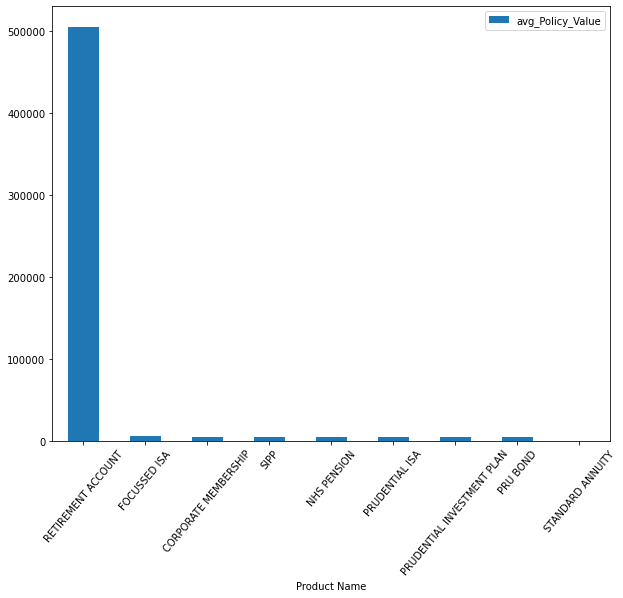

In [50]:
Policy_avg.plot(kind='bar', figsize=(10,8),x='Product Name',y='avg_Policy_Value',rot=50)

# Avg Policy Value for each Product Category

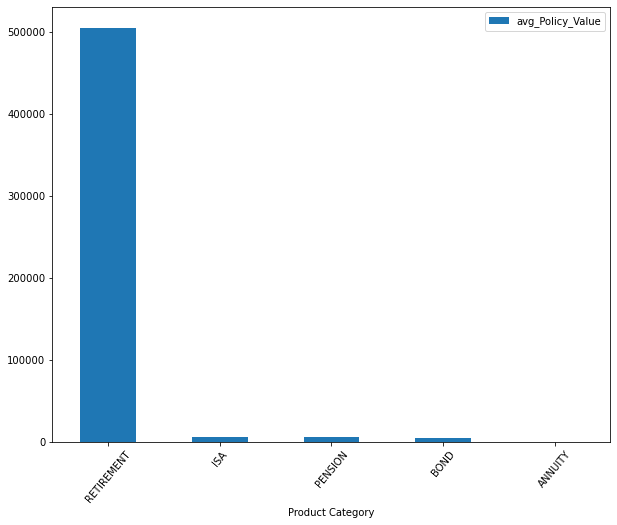

In [51]:
sqlite_query = """
SELECT "Product Category", 
AVG ("Policy Value") as "avg_Policy_Value" 
from "Policy_Table" 
GROUP BY "Product Category"
ORDER BY "avg_Policy_Value" DESC

"""

Policy_avg_1 = pd.read_sql(sqlite_query, conn)
Policy_avg_1.fillna(0,inplace=True)
Policy_avg_1.plot(kind='bar', figsize=(10,8),x='Product Category',y='avg_Policy_Value',rot=50)

In [52]:
Fund_Table_Year = Fund_Table.copy()
Fund_Table_Year

,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
...,...,...,...,...,...,...
72116,RET100998,CO213842,2018-11-30 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,470727.090909
72117,RET100998,CO213842,2018-12-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,520272.545455
72118,RET100998,CO213842,2019-01-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,569818.000000
72119,RET100999,CO936943,2018-12-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,490378.500000


In [53]:
Fund_Table_Year['year'] = pd.DatetimeIndex(Fund_Table_Year['Date']).year
Fund_Table_Year['month'] = pd.DatetimeIndex(Fund_Table_Year['Date']).month

In [54]:
Fund_Table_Year

,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot,year,month
0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN,2009,10
1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,NaN,2009,11
2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN,2009,12
3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN,2010,1
4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,NaN,2010,2
...,...,...,...,...,...,...,...,...
72116,RET100998,CO213842,2018-11-30 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,470727.090909,2018,11
72117,RET100998,CO213842,2018-12-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,520272.545455,2018,12
72118,RET100998,CO213842,2019-01-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,569818.000000,2019,1
72119,RET100999,CO936943,2018-12-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,490378.500000,2018,12


In [55]:
x1 = Fund_Table_Year.groupby('year').sum()
x1

,Policy_Value_Snapshot,month
year,,
2009,4.919777e+06,2345
2010,3.052222e+07,11581
2011,5.115695e+07,20045
2012,7.139402e+07,28806
2013,9.024006e+07,38097
2014,1.046847e+08,47456
2015,9.796570e+07,49608
2016,2.583768e+08,66561
2017,1.155131e+09,93427


In [56]:
x1 = x1.drop(['month'], axis = 1)

# Total Sales Over the Years

Text(0.5, 1.0, 'Total Sales Over the Years')

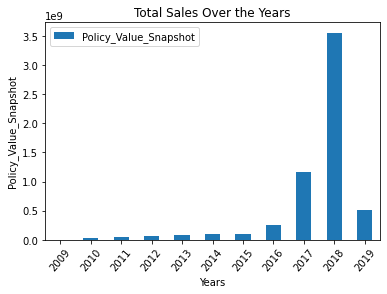

In [57]:
x1.plot(kind='bar',rot=50)
plt.xlabel("Years")
plt.ylabel("Policy_Value_Snapshot")
plt.title("Total Sales Over the Years")

In [58]:
Fund_Table_Year.groupby('year')

In [59]:
fund_viz_df = Fund_Table.copy()
fund_viz_df['Year'] = pd.DatetimeIndex(fund_viz_df['Date']).year
fund_viz_df['Month'] = pd.DatetimeIndex(fund_viz_df['Date']).month
fund_viz_df = fund_viz_df.groupby(['Year', 'Product Category']).agg({'Policy_Value_Snapshot': [ 'sum']}).reset_index()

In [60]:
fund_viz_df

,Year,Product Category,Policy_Value_Snapshot
,,,sum
0,2009,ANNUITY,0.000000e+00
1,2009,BOND,1.361225e+06
2,2009,ISA,2.533104e+06
3,2009,PENSION,1.025448e+06
4,2010,ANNUITY,0.000000e+00
5,2010,BOND,7.926164e+06
6,2010,ISA,1.315401e+07
7,2010,PENSION,9.442044e+06
8,2011,ANNUITY,0.000000e+00


In [61]:
Fund_Table_month = Fund_Table_Year.groupby(['year', 'month']).agg({'Policy_Value_Snapshot': ['sum']}).reset_index()

In [62]:
Fund_Table_month

,year,month,Policy_Value_Snapshot
,,,sum
0,2009,7,1.971680e+05
1,2009,8,4.421958e+05
2,2009,9,7.840676e+05
3,2009,10,9.016460e+05
4,2009,11,1.215510e+06
...,...,...,...
110,2018,9,3.506112e+08
111,2018,10,3.835089e+08
112,2018,11,4.199119e+08


# Sales per Month

Text(0.5, 1.0, 'Sales per Month')

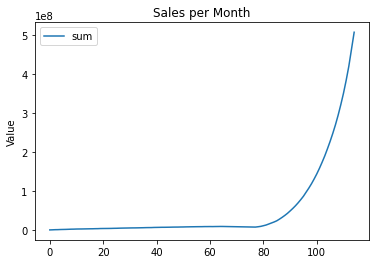

In [63]:
Fund_Table_month['Policy_Value_Snapshot'].plot(kind='line')
plt.xlabel('')
plt.ylabel("Value")
plt.title("Sales per Month")

# AGE DISTRIBUTION

Text(0.5, 1.0, 'AGE DISTRIBUTION')

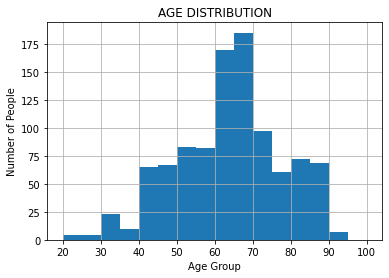

In [64]:
Customer_Table.hist('Age', bins = [20, 25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.title('AGE DISTRIBUTION')

In [66]:
all_data_query = '''SELECT *
FROM Customer_Table as ct
INNER JOIN 
Policy_Table as pt
ON ct."customer id" = pt."customer id"
INNER JOIN 
Fund_Table as ft
ON pt."customer id"=ft."customer id" and pt."Policy Number"=ft."Policy Number"
'''
all_data = pd.read_sql( all_data_query , conn)
all_data.drop(columns=['index'],inplace=True)
all_data.columns = ['Customer ID', 'Email', 'Gender', 'Age', 'Postcode', 'Policy Number',
       'Customer ID1', 'Product Category', 'Product Name', 'Policy Value',
       'Policy Start Date', 'Policy Number1', 'Customer ID2', 'Date',
       'Product Category1', 'Product Name1', 'Policy_Value_Snapshot']
all_data.drop(columns=['Customer ID1', 'Policy Number1','Customer ID2', 'Product Name1','Product Category1'],inplace=True)
viz_all = all_data.copy()
viz_all = viz_all.groupby(['Product Name']).agg(total_current_policy_value=pd.NamedAgg(column="Policy Value", aggfunc="sum"),
                                                total_previous_policy_value=pd.NamedAgg(column="Policy_Value_Snapshot", aggfunc="sum"))
viz_all.reset_index(inplace=True)

<Figure size 720x720 with 0 Axes>

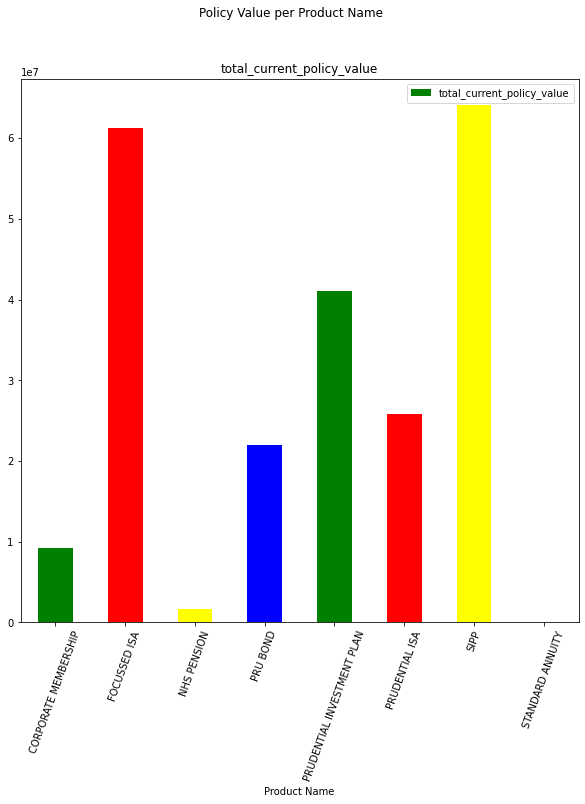

<Figure size 720x720 with 0 Axes>

In [67]:
viz_all=viz_all[viz_all['Product Name']!='RETIREMENT ACCOUNT']
viz_all.plot.bar(y="total_current_policy_value", x="Product Name", rot=70, title="Policy Value per Product Name",color=["green","red","yellow","blue"],subplots=True, figsize=(10,10))
plt.figure(figsize= (10,10))

In [68]:
fund_viz_df = Fund_Table.copy()
fund_viz_df['Year'] = pd.DatetimeIndex(fund_viz_df['Date']).year
fund_viz_df['Month'] = pd.DatetimeIndex(fund_viz_df['Date']).month
fund_viz_df.columns

Index(['Policy Number', 'Customer ID', 'Date', 'Product Category',
       'Product Name', 'Policy_Value_Snapshot', 'Year', 'Month'],
      dtype='object')

In [69]:
fv = fund_viz_df.groupby(['Year', 'Product Category']).agg({'Policy_Value_Snapshot': ['sum']}).reset_index()

# Policy Value per Product Name

<Figure size 720x720 with 0 Axes>

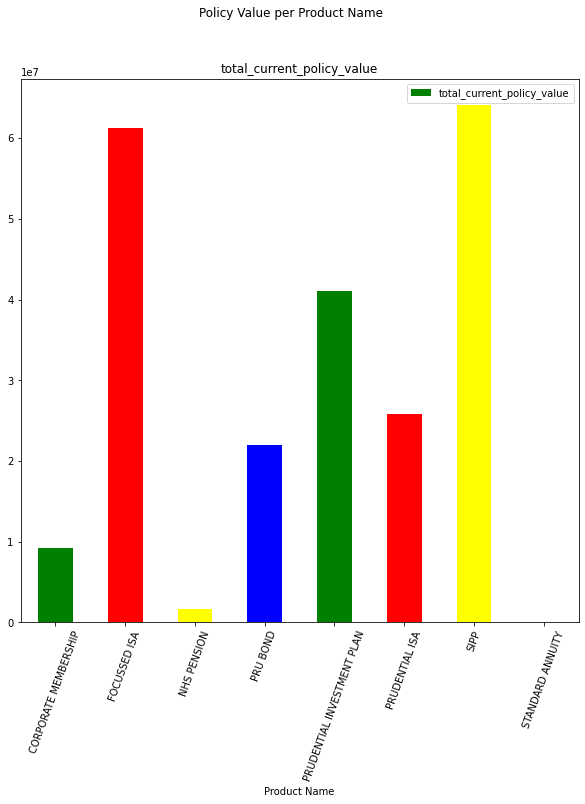

<Figure size 720x720 with 0 Axes>

In [70]:
Fund_Table_month
multi = fv.set_index(['Year','Product Category'])
#multi.plot.bar
multi
viz_all=viz_all[viz_all['Product Name']!='RETIREMENT ACCOUNT']
viz_all.plot.bar(y="total_current_policy_value", x="Product Name", rot=70, title="Policy Value per Product Name",color=["green","red","yellow","blue"],subplots=True, figsize=(10,10))
plt.figure(figsize= (10,10))
#tt.plot(x = 'Policy_Value_Snapshot', y = 'Year', kind = 'hexbin', gridsize = 20)

# Policy Value vs Policy & year-wise distribution

Text(0.5, 1.0, 'Policy Value vs Policy & year-wise distribution')

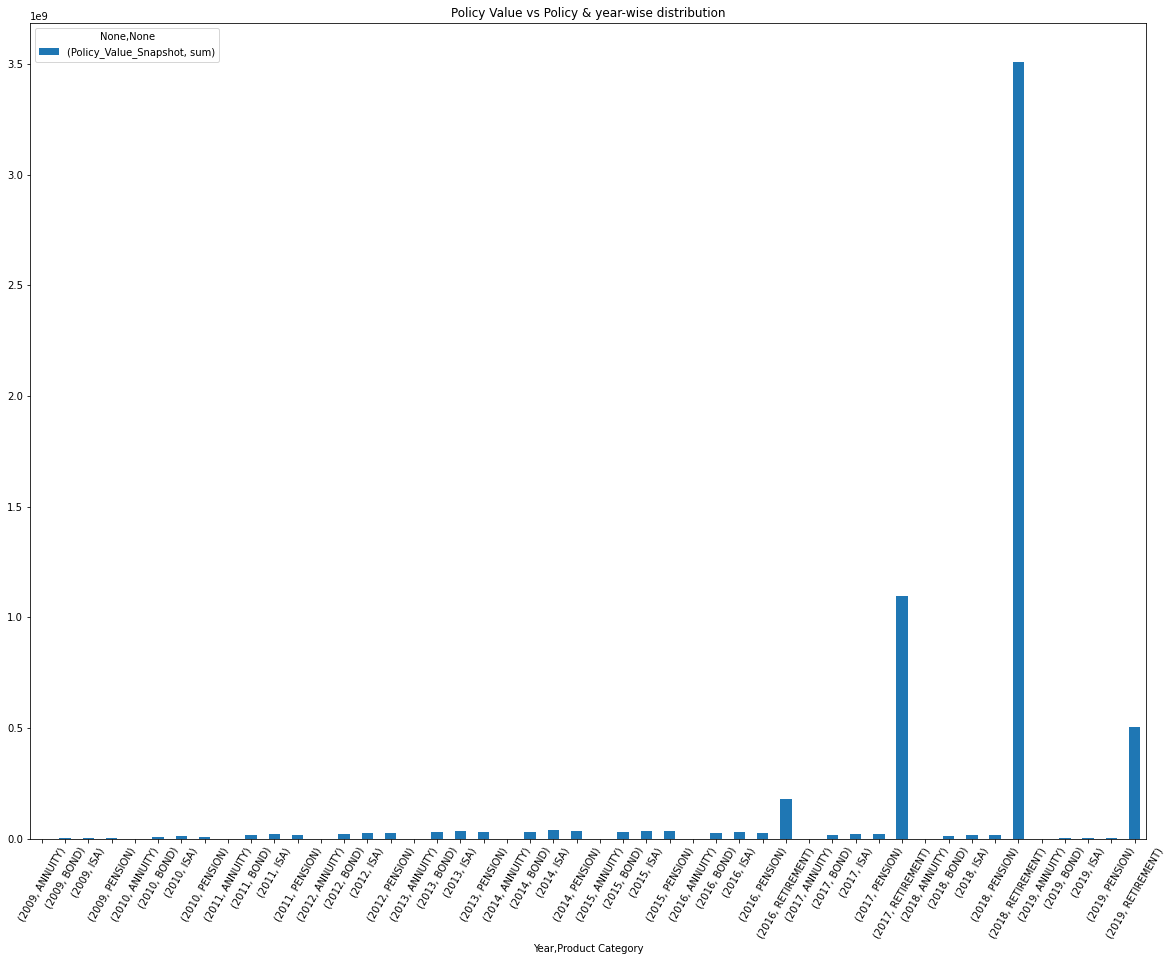

In [73]:
multi = fv.set_index(['Year','Product Category'])
multi
multi.plot.bar(rot=60, figsize=(20,15))
plt.title("Policy Value vs Policy & year-wise distribution")

# Histogram of Policy Value

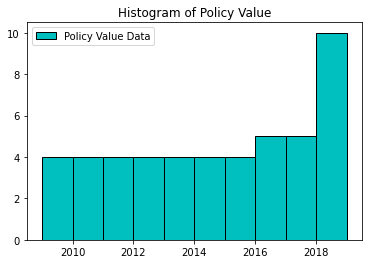

In [74]:
plt.hist(fv['Year'], histtype='bar', align='mid', color='c', label='Policy Value Data',edgecolor='black')
plt.legend(loc=2)
plt.title('Histogram of Policy Value')
plt.show()